In [1]:
import os
from scipy.io import loadmat
import  sklearn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Digit Recognition.ipynb',
 'ex3data1.mat',
 'ex3weights.mat',
 'Neural network .ipynb']

In [3]:
data = loadmat('ex3data1.mat')
theta = loadmat('ex3weights.mat')

In [ ]:
data

In [4]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [5]:
X=data['X']

In [6]:
print(X.shape)

(5000, 400)


In [8]:
y = data['y']

In [9]:
y.shape

(5000, 1)

In [10]:
X = np.c_[np.ones((5000,1)),X]

In [11]:
X.shape

(5000, 401)

In [12]:
theta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [8]:
theta1= theta['Theta1']
theta2 = theta['Theta2']

In [9]:
theta1[0]

array([-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, -6.92223359e-06,
        8.88278871e-05, -2.42735628e-04, -2.70957302e-03,  1.45757191e-03,
        2.46026364e-03,  7.13629532e-04, -5.70078885e-04, -2.31464986e-04,
        5.12911249e-04,  1.13402876e-03,  3.62593523e-04,  4.12173828e-04,
        1.32134340e-04,  1.37730345e-04,  1.07593046e-05, -2.12161426e-06,
        1.14186154e-09,  2.20317337e-08, -4.95776468e-07,  7.96752261e-05,
       -7.40617279e-04, -4.30419304e-04,  2.15555175e-03,  9.27076318e-03,
        1.50701482e-02,  7.36894310e-03,  7.66312246e-03,  6.38584723e-04,
       -8.66664392e-03, -1.36946721e-02, -1.80244907e-03, -1.98550526e-03,
       -1.33854878e-03,  4.11799777e-05,  3.61518629e-03,  3.27367511e-04,
       -1.02609244e-04, -2.51764893e-07,  1.72926132e-05,  4.30306233e-04,
       -4.31866730e-03, -2.44277714e-02, -4.29677743e-02, -2.34169922e-02,
        4.87858916e-02,  1.25561218e-01,  7.77852907e-02,  3.98915622e-02,
        3.34552027e-02, -

In [19]:
print(theta2[0])

[-0.76100352 -1.21244498 -0.10187131 -2.36850085 -1.05778129 -2.20823629
  0.56383834  1.21105294  2.21030997  0.44456156 -1.18244872  1.04289112
 -1.60558756  1.30419943  1.37175046  1.74825095 -0.23365648 -1.52014483
  1.15324176  0.10368082 -0.37207719 -0.61530019 -0.1256836  -2.27193038
 -0.71836208 -1.29690315]


In [23]:
print(theta1.shape)
print(theta2.shape)
print(type(theta1))

(25, 401)
(10, 26)
<class 'numpy.ndarray'>


In [24]:
m,n = X.shape

In [34]:
def hypothesis(z):
    hx = 1/(1+np.exp(-z))
    return(hx)

In [100]:
y = np.where(y==10,0,y)
predict = []
for i in range(m):
    a1 = X[i,:].reshape((n,1))
    
    z2 = theta1.dot(a1 )  #(25x401)(401x1)=(25x1)
    a2 = hypothesis(z2)
    a2 = np.vstack((np.ones(1),a2))  #(26x1)
    z3 = theta2.dot(a2)   #(10x26)(26x1)=(10x1)
    a3 = hypothesis(z3)
    a3list = list(a3)
    predict.append((a3list.index(max(a3))+1)%10)
print(len(predict))

5000


In [101]:
predict = np.array(predict).reshape((m,1))
accuracy = np.mean(predict==y)*100
accuracy

97.52

In [98]:
predict[4606]

array([9])

In [99]:
y[4606]

array([9], dtype=uint8)

Label:  [8]


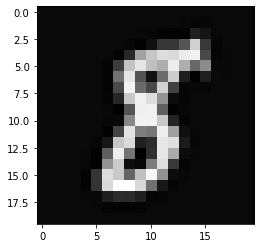

In [102]:
print("Label: ",predict[4008])
plt.imshow(X[4008,1:].reshape(20,20,order='F'),cmap = 'gist_gray')